<h1 style="color:black;font-family:Times New Roman font-weight:bold">Student Marks prediction</h1>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv("students_data.csv")
df.head(5)

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [4]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [6]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


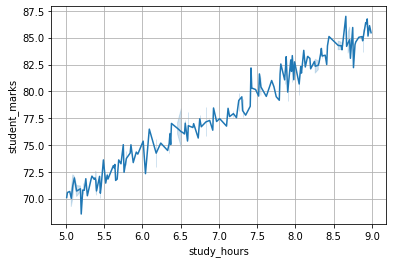

In [7]:
sns.lineplot(x='study_hours',y='student_marks', data=df)
plt.grid()

<AxesSubplot:xlabel='study_hours', ylabel='student_marks'>

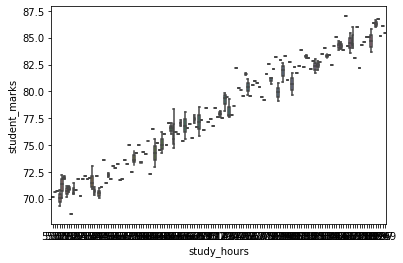

In [8]:
sns.boxplot(x='study_hours',y='student_marks', data=df)

<AxesSubplot:>

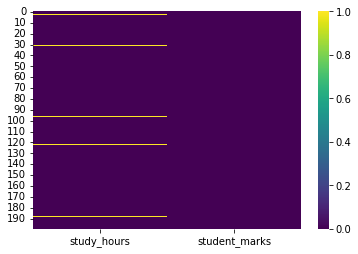

In [9]:
sns.heatmap(df.isnull(),  cmap='viridis')

In [10]:
df['study_hours']=df['study_hours'].fillna(df['study_hours'].mean())

In [11]:
df.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [12]:
df.head()

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19


In [13]:
X=df.drop('student_marks',axis=1)
y=df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=2)


In [14]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [15]:
lr.fit(X_train,y_train)

LinearRegression()

In [16]:
lr.coef_

array([3.88070839])

In [17]:
lr.intercept_

50.76447075455565

In [18]:
y_pred=lr.predict(X_test)
np.count_nonzero(y_pred)


60

In [19]:
from sklearn.metrics import mean_squared_error,r2_score

In [20]:
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
rmse

1.0235558605770672

In [21]:
r_squared=r2_score(y_test,y_pred)
r_squared

0.9597777276842148

In [22]:
pd.DataFrame(np.c_[X_test,y_test,y_pred],columns=['study_hrs','stud_original_marks','stud_predicted_marks'])

,study_hrs,stud_original_marks,stud_predicted_marks
0,6.920000,76.38,77.618973
1,7.480000,80.17,79.792170
2,8.660000,86.99,84.371405
3,8.350000,83.50,83.168386
4,7.550000,79.64,80.063819
5,5.630000,72.87,72.612859
6,6.590000,75.37,76.338339
7,8.760000,82.21,84.759476
8,5.790000,74.44,73.233772
9,7.100000,76.76,78.317500


In [23]:
print(lr.predict(X_train))

[73.81587859 73.11735108 80.60711828 71.95313857 83.16838582 76.60998864
 71.02176855 71.48745356 73.42780776 76.02788238 77.81300824 81.0339962
 81.7713308  73.58303609 76.2219178  76.37714613 84.56544084 85.57442502
 80.64592536 77.91370764 73.73826443 81.2668387  78.66676408 78.93841367
 75.40696903 77.26970906 76.88163822 74.74724861 85.22516126 72.8457015
 79.55932701 79.98620494 83.32361415 81.07280328 76.2219178  82.31462997
 77.6577799  83.51764957 72.69047316 72.30240232 78.3951145  78.47272866
 84.13856291 71.02176855 81.42206704 77.03686656 82.43105122 84.48782667
 75.44577612 82.12059455 82.58627956 82.08178747 76.06668946 85.45800377
 79.13244909 73.23377234 79.09364201 82.2370158  83.98333458 82.0041733
 79.94739785 77.46374448 83.40122832 70.94415439 81.61610246 84.72066917
 81.30564579 83.09077165 78.93841367 81.57729538 70.43966229 75.32935487
 73.078544   80.52950411 73.58303609 71.60387481 72.06955982 84.60424792
 71.25461106 84.56544084 70.59489063 71.09938272 76.02

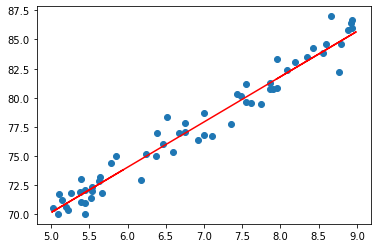

In [24]:
plt.scatter(X_test,y_test)
plt.plot(X_train.values,lr.predict(X_train),color='r')


In [27]:
import joblib
joblib.dump(lr,"Student_mark.pkl")

['Student_mark.pkl']

In [28]:
model=joblib.load("Student_mark.pkl")

In [33]:
model.predict([[5]])[[0][0]].round(2)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


70.17